# ML&Fintech HW1 Q10

## (a) To begin, load in the Boston data set, which is part of the ISLP library.

In [64]:
!pip install ISLP

In [65]:
from ISLP import load_data
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Boston = load_data('Boston')

## (b) How many rows are in this data set? How many columns? Whatdo the rows and columns represent?

column detail get from https://islp.readthedocs.io/en/latest/datasets/Boston.html.

- columns: 13
    - `crim`: per capita crime rate by town.
    - `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.
    - `indus`: proportion of non-retail business acres per town.
    - `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
    - `nox`: nitrogen oxides concentration (parts per 10 million).
    - `rm`: average number of rooms per dwelling.
    - `age`: proportion of owner-occupied units built prior to 1940.
    - `dis`: weighted mean of distances to five Boston employment centres.
    - `rad`: index of accessibility to radial highways.
    - `tax`: full-value property-tax rate per $10,000.
    - `ptratio`: pupil-teacher ratio by town.
    - `lstat`: lower status of the population (percent).
    - `medv`: median value of owner-occupied homes in $1000s.
- rows: 506
    - Represent all property data for a particular house or neighborhood.

In [66]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [67]:
Boston.shape

(506, 13)

In [68]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [69]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### (c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your fndings.

### Relations Findings:
- Positive Correlation Relations:
  - nox and indus
  - rm and medv
  - tax and rad
- Negative Correlation Relations:
  - dis and nox
  - lstat and medv
  - ptratio and medv
- The chas has no relations with others because it's boolean data.

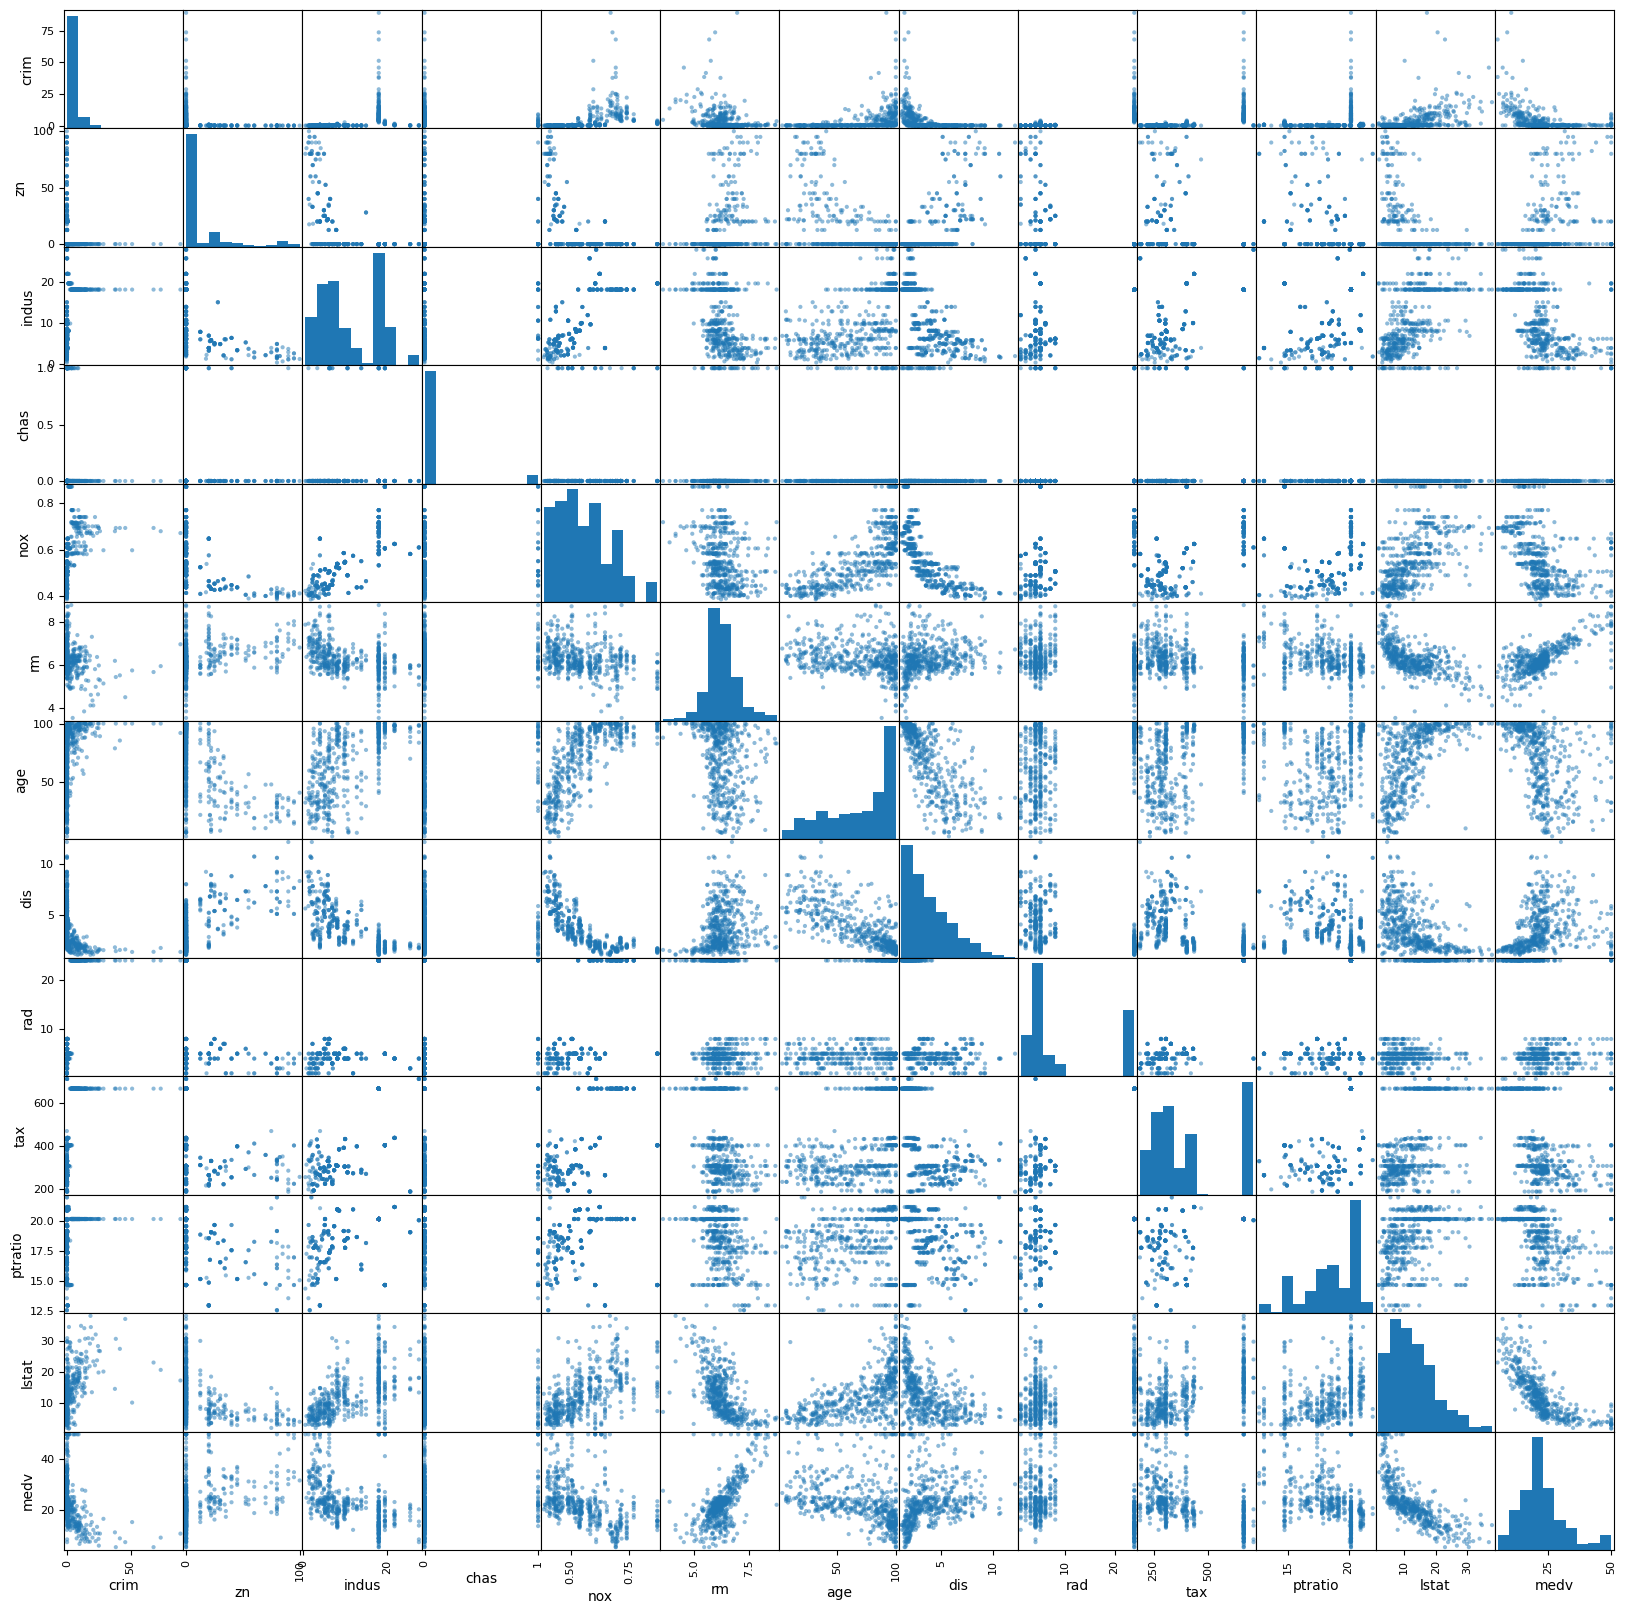

In [70]:
pd.plotting.scatter_matrix(Boston, figsize=(20, 20))
plt.show()

## (d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship

### Define
In this case, we define the strength of correlation as follows:
- No Correlation: (0 ≥ |r| > 0.3)
- Weak Correlation: (0.3 ≥ |r| > 0.5)
- Strong Correlation: (|r| ≥ 0.5)

### Relationship
- No Relation
  - ptratio
  - chas
  - rm
  - zn
- Weak Positive Relation
  - nox
  - indus
  - age
  - lstat
- Weak Negative Relation
  - dis
  - medv
- Strong Positive Relation
  - rad
  - tax
- Strong Negative Relation
  - none

### Summary
The rad has most positive relation, and the medv has most negative relation with crim.


In [71]:
correlation_with_crim = Boston.corr()['crim'].sort_values(ascending=False)
print(correlation_with_crim)

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64


## (e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

### Conclusion
- In crim, the number 380 has the highest crime rate, with an approximate 11% difference from the second place, number 418. As seen in the distribution chart, this crime rate is extreme, as most of the suburbs have crime rates falling between 0% and 20%.
- In tax, many suburbs have high taxes. Based on observation, they are usually neighboring suburbs. This pattern is not immediately apparent in the earlier data. However, looking at the distribution, the suburbs with high taxes are concentrated at the higher end, with a significant gap between 650 and 450. Apart from the high-tax areas, the rest have very low tax rates.
- In ptratio, 355 and 354 have the highest ratios. Similar to tax, neighboring suburbs tend to have similar values. The distribution mostly falls between 20 and 22, with the average around 18 to 20.

In [72]:
Boston.sort_values(by='crim', ascending=False).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,20.62,8.8
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,36.98,7.0


In [73]:
Boston.sort_values(by='tax', ascending=False).head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,13.35,20.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,29.68,8.1
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,18.06,15.2
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,18.03,14.6
477,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,24.91,12.0
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,18.68,16.7
479,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,24,666,20.2,13.11,21.4
470,4.34879,0.0,18.10,0,0.580,6.167,84.0,3.0334,24,666,20.2,16.29,19.9


In [74]:
Boston.sort_values(by='ptratio', ascending=False).head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,5.57,20.6
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,8.05,18.2
129,0.88125,0.0,21.89,0,0.624,5.637,94.7,1.9799,4,437,21.2,18.34,14.3
128,0.32543,0.0,21.89,0,0.624,6.431,98.8,1.8125,4,437,21.2,15.39,18.0
133,0.32982,0.0,21.89,0,0.624,5.822,95.4,2.4699,4,437,21.2,15.03,18.4


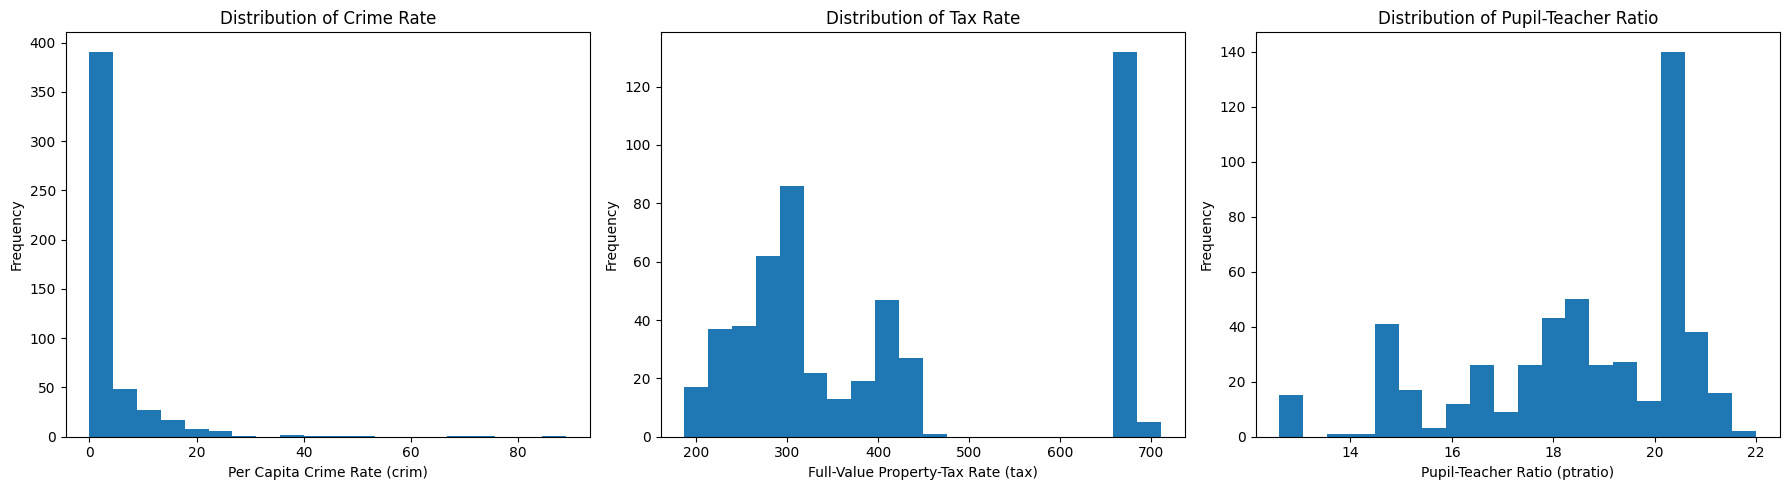

In [75]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(Boston['crim'], bins=20)
axes[0].set_xlabel('Per Capita Crime Rate (crim)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Crime Rate')

axes[1].hist(Boston['tax'], bins=20)
axes[1].set_xlabel('Full-Value Property-Tax Rate (tax)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Tax Rate')

axes[2].hist(Boston['ptratio'], bins=20)
axes[2].set_xlabel('Pupil-Teacher Ratio (ptratio)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Pupil-Teacher Ratio')

plt.tight_layout()
plt.show()

## (f) How many of the suburbs in this data set bound the Charlesriver?

In [76]:
charles_river_suburbs = Boston[Boston['chas'] == 1].shape[0]
print(f"There are {charles_river_suburbs} suburbs that bound the Charles River.")

There are 35 suburbs that bound the Charles River.


## (g) What is the median pupil-teacher ratio among the towns in this data set?

In [77]:
median_ptratio = Boston['ptratio'].median()
print(f"The median pupil-teacher ratio is: {median_ptratio}")

The median pupil-teacher ratio is: 19.05


## (h) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your fndings.

### Conclussion
Both the 398 and 405 suburbs have a higher MEDV of owner-occupied homes, with a value of 5.0. After the observation, they show some similarities in other predictors for those suburbs, as listed below.
- indus, zn, nox, age, rad, tax, and ptratio are the same.
- rm and dis are nearly the same.
- crim and lstat are significantly different.

### Compare with overall data
| **Feature** | **Value of 398 Suburbs** | **Value of 405 Suburbs** | **Relation with Overall Data** |
|-------------|--------------------------|--------------------------|---------------------------------|
| **crim**    | 38.3518                  | 67.9208                  | Both values are much higher than the mean of 3.61, indicating high crime rates in these suburbs. |
| **zn**      | 0                        | 0                        | Both values are below the 25% quartile (0), showing minimal residential zoning. |
| **indus**   | 18.1                     | 18.1                     | Both values are significantly higher than the mean of 11.14, indicating a high percentage of industrial land. |
| **chas**    | 0                        | 0                        | Both suburbs have no proximity to the Charles River, as reflected by the value of 0. |
| **nox**     | 0.693                    | 0.693                    | Both values are higher than the mean of 0.55, indicating higher levels of nitrogen oxides pollution. |
| **rm**      | 5.453                    | 5.683                    | Both values are below the mean of 6.28, indicating relatively smaller average room sizes in these suburbs. |
| **age**     | 100                      | 100                      | Both values are at the maximum of the age variable, indicating these suburbs are mostly composed of old buildings. |
| **dis**     | 1.4896                   | 1.4254                   | Both values are lower than the mean of 3.80, indicating these suburbs are far from employment centers. |
| **rad**     | 24                       | 24                       | Both values are at the maximum of 24, indicating the suburbs have high accessibility to radial highways. |
| **tax**     | 666                      | 666                      | Both values are much higher than the mean of 408.24, indicating high property tax rates in these suburbs. |
| **ptratio** | 20.2                     | 20.2                     | Both values are higher than the mean of 18.46, reflecting a higher pupil-teacher ratio. |
| **lstat**   | 30.59                    | 22.98                    | The value for 398 suburbs is much higher than the mean of 12.65, indicating higher levels of lower-status residents. The value for 405 suburbs is slightly above the mean, but still high. |


In [78]:
min_medv_value = Boston['medv'].min()
lowest_medv_suburbs = Boston[Boston['medv'] == min_medv_value]

print("Suburb(s) with the lowest median value of owner-occupied homes:")
print(lowest_medv_suburbs)

Boston.describe()

Suburb(s) with the lowest median value of owner-occupied homes:
        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   

     ptratio  lstat  medv  
398     20.2  30.59   5.0  
405     20.2  22.98   5.0  


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## (i)  In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [79]:
suburbs_more_than_7_rooms = Boston[Boston['rm'] > 7].shape[0]
suburbs_more_than_8_rooms = Boston[Boston['rm'] > 8].shape[0]

print(f"There are {suburbs_more_than_7_rooms} suburbs with more than 7 rooms per dwelling.")
print(f"There are {suburbs_more_than_8_rooms} suburbs with more than 8 rooms per dwelling.\n")

There are 64 suburbs with more than 7 rooms per dwelling.
There are 13 suburbs with more than 8 rooms per dwelling.



### Comparison  
Below is the data comparison between "the suburbs that average more than eight rooms per dwelling" and "overall data average".

- `crim`: The average crime rate for these suburbs is significantly lower than the overall average crime rate.  
- `zn`: The average zn for these suburbs is slightly higher than the overall average, but the standard deviation is very high, indicating a large spread within this small group.  
- `indus`: The average indus for these suburbs is lower than the overall average.  
- `chas`: The average chas for these suburbs is higher than the overall average, meaning a larger proportion of these suburbs border the Charles River.  
- `nox`: The average nox for these suburbs is slightly lower than the overall average.  
- `age`: The average age for these suburbs is slightly higher than the overall average.  
- `dis`: The average dis for these suburbs is slightly lower than the overall average, suggesting they are, on average, slightly closer to employment centers.  
- `rad`: The average rad for these suburbs is lower than the overall average.  
- `tax`: The average tax for these suburbs is lower than the overall average.  
- `ptratio`: The average ptratio for these suburbs is lower than the overall average.  
- `lstat`: The average lstat for these suburbs is significantly lower than the overall average.  
- `medv`: The average medv for these suburbs is significantly higher than the overall average.

In [80]:
suburbs_8_plus_rooms = Boston[Boston['rm'] > 8]
suburbs_8_plus_rooms

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,5.12,50.0


In [81]:
suburbs_8_plus_rooms.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000
